<a href="https://colab.research.google.com/github/Bhargavi009/OIBSIP/blob/main/Copy_of_Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# read data
application = pd.read_csv("/content/application_record.csv")
credit_status=pd.read_csv("/content/credit_record.csv")
credit_status.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [ ]:
out_df =credit_status.groupby(['MONTHS_BALANCE']).agg(
    # Counts
    counts=('MONTHS_BALANCE', lambda x: len(x) ),
    # Percent
    percent = ('MONTHS_BALANCE', lambda x: (len(x)*100/ len(credit_status['MONTHS_BALANCE'])))
    ).reset_index()
out_df

,MONTHS_BALANCE,counts,percent
0,-60,415,0.039578
1,-59,820,0.078201
2,-58,1255,0.119686
3,-57,1649,0.157261
4,-56,2109,0.201130
...,...,...,...
56,-4,33365,3.181937
57,-3,33854,3.228572
58,-2,34209,3.262428
59,-1,34436,3.284076


In [ ]:
pd.pivot_table(out_df,index=['MONTHS_BALANCE'])

,counts,percent
MONTHS_BALANCE,,
-60,415,0.039578
-59,820,0.078201
-58,1255,0.119686
-57,1649,0.157261
-56,2109,0.201130
...,...,...
-4,33365,3.181937
-3,33854,3.228572
-2,34209,3.262428


In [ ]:
app_credit_status= pd.merge(application,credit_status, how='inner', on='ID')
len(app_credit_status)

768419

In [ ]:
credit_card_first_month =credit_status.groupby(['ID']).agg(
   start_month=  ('MONTHS_BALANCE', min)
    ).reset_index()
credit_card_first_month.head()

,ID,start_month
0,5001711,-3
1,5001712,-18
2,5001713,-21
3,5001714,-14
4,5001715,-59


In [ ]:
import datetime
credit_card_first_month['account_open_month']= datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
credit_card_first_month['account_open_month']= credit_card_first_month['account_open_month'] + credit_card_first_month['start_month'].values.astype("timedelta64[M]")
credit_card_first_month['account_open_month']=credit_card_first_month['account_open_month'].dt.strftime('%b-%Y')
credit_card_first_month.head()

,ID,start_month,account_open_month
0,5001711,-3,Oct-2019
1,5001712,-18,Jul-2018
2,5001713,-21,Apr-2018
3,5001714,-14,Nov-2018
4,5001715,-59,Feb-2015


In [ ]:
credit_start_status = pd.merge(credit_card_first_month, credit_status, how='left', on=['ID'])

credit_start_status['start_month']=abs(credit_start_status['start_month'])+credit_start_status['MONTHS_BALANCE']
credit_start_status.head()

,ID,start_month,account_open_month,MONTHS_BALANCE,STATUS
0,5001711,3,Oct-2019,0,X
1,5001711,2,Oct-2019,-1,0
2,5001711,1,Oct-2019,-2,0
3,5001711,0,Oct-2019,-3,0
4,5001712,18,Jul-2018,0,C


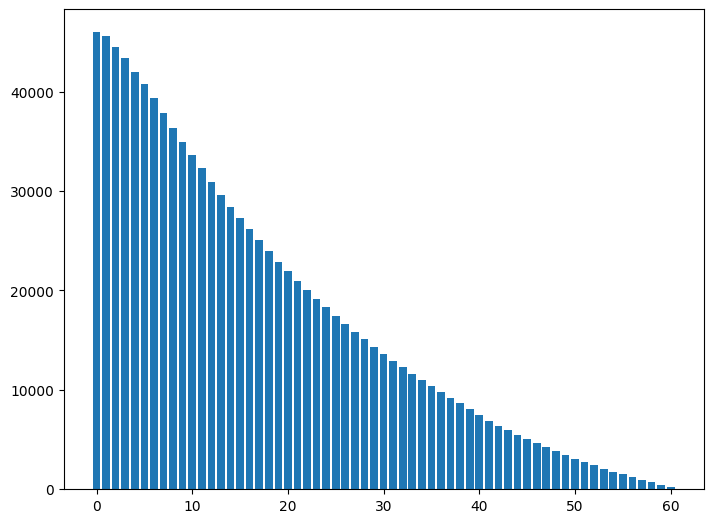

In [ ]:
accounts_counts =pd.DataFrame({'start_month':credit_start_status.groupby('start_month')['start_month'].count()})
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(accounts_counts.index,accounts_counts['start_month'])
plt.show()

Text(0, 0.5, '% Bad Rate')

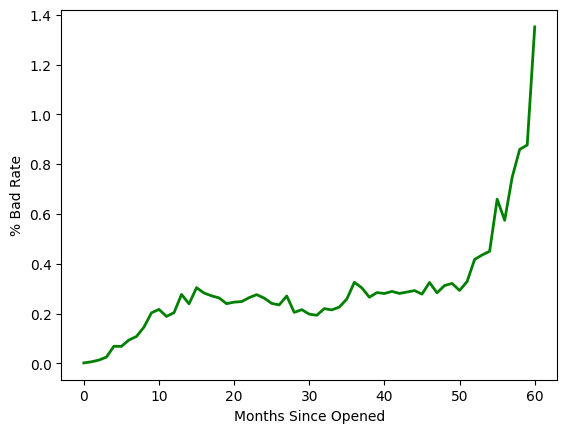

In [ ]:
month_status_counts = credit_start_status.groupby(['start_month', 'STATUS']).size().reset_index(name='counts')
month_counts = credit_start_status.groupby(['start_month']).size().reset_index(name='month_counts')
# join the table
month_status_pct = pd.merge(month_status_counts, month_counts, how='left', on=['start_month'])
month_status_pct['status_pct']=month_status_pct['counts']/month_status_pct['month_counts']*100
month_status_pct= month_status_pct.loc[:,['start_month','STATUS','status_pct']]
# Restucture
month_status_pct1 = month_status_pct.pivot(index='start_month', columns='STATUS', values='status_pct')
# Fill with 0
month_status_pct1=month_status_pct1.fillna(0).reset_index()
import matplotlib.pyplot as pt
pt.plot(month_status_pct1.index, month_status_pct1['4']+month_status_pct1['5'],
     color='green',
     linestyle='solid',
     linewidth=2,
     markersize=12)
pt.xlabel('Months Since Opened')
pt.ylabel('% Bad Rate')

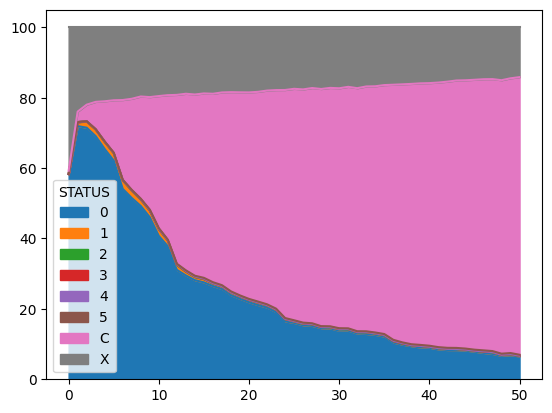

In [ ]:
month_status_pct2 = month_status_pct1.loc[month_status_pct1.index<=50]
# drop column start_month
month_status_pct2=month_status_pct2.drop('start_month', axis=1)
import matplotlib.pyplot as plot
month_status_pct2.plot.area(stacked=True);
plot.show(block=True);

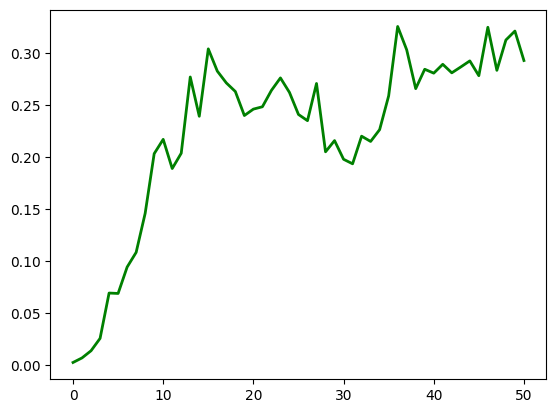

In [ ]:
import matplotlib.pyplot as pt
pt.plot(month_status_pct2.index, month_status_pct2['4']+month_status_pct2['5'],
     color='green',
     linestyle='solid',
     linewidth=2,
     markersize=12)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
credit_start_status.groupby('STATUS')['STATUS'].count()
# We will remove rows with status as C and X
credit_start_status1 = credit_start_status.loc[ (credit_status['STATUS'] !='X') & (credit_status['STATUS'] !='C') ,:]
# Change status as numeric
credit_start_status1['status'] = credit_start_status1['STATUS'].astype('int64', copy=False)
credit_start_status1 = credit_start_status1.loc[credit_start_status1['start_month']<=18,['ID','start_month','status']]
credit_start_status1

,ID,start_month,status
1,5001711,2,0
2,5001711,1,0
3,5001711,0,0
13,5001712,9,0
14,5001712,8,0
...,...,...,...
1048540,5150484,2,0
1048541,5150484,1,0
1048542,5150484,0,0
1048543,5150485,1,0


In [ ]:
# Find Max Status Values
status = credit_start_status1.groupby(['ID']).agg(
    # Max Status
    max_status=('status','max')

    ).reset_index()
# Validate
status.groupby('max_status')['max_status'].count()

max_status
0    34830
1     4346
2      305
3       81
4       30
5      159
Name: max_status, dtype: int64

In [ ]:
import numpy as np
# Define
status['label']=np.where(status['max_status']>=4, 1,0)
# Validate
status.groupby('label')['label'].count()

label
0    39562
1      189
Name: label, dtype: int64

In [ ]:
status.groupby('label')['label'].count()*100/len(status['label'])

label
0    99.52454
1     0.47546
Name: label, dtype: float64

In [ ]:
label_1 = status.loc[status['label']==1,:]
# All with label 0
label_0 = status.loc[status['label']==0,:]
# Select randomly few rows
label_0_biased=label_0.sample(n = 1701)
# Combined Sample IDs with Biased Sampling

frames = [label_1,label_0_biased]
import pandas as pd
labels_biased = pd.concat(frames)

# Keep only ID and Label Columns

labels_biased=labels_biased.loc[:,['ID','label']]
labels_biased

,ID,label
1156,5003471,1
1380,5003804,1
1885,5004559,1
2091,5004891,1
2753,5008827,1
...,...,...
25441,5091561,0
3585,5010028,0
15858,5052859,0
23456,5088307,0


In [ ]:
# Combine Labels and Application Data
model_df = pd.merge (labels_biased, application,how='inner',on=['ID'] )
len(model_df)

1435

In [ ]:
model_df.groupby('label')['label'].count()*100/len(model_df['label'])

label
0    95.33101
1     4.66899
Name: label, dtype: float64

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

missing_values_table(model_df)

Your selected dataframe has 19 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
OCCUPATION_TYPE,467,32.5


In [ ]:
def featureType(df):
    import numpy as np
    from pandas.api.types import is_numeric_dtype

    columns = df.columns
    rows= len(df)
    colTypeBase=[]
    colType=[]
    for col in columns:
        try:
            try:
                uniq=len(np.unique(df[col]))
            except:
                 uniq=len(df.groupby(col)[col].count())
            if rows>10:
                if is_numeric_dtype(df[col]):

                    if uniq==1:
                        colType.append('Unary')
                        colTypeBase.append('Unary')
                    elif uniq==2:
                        colType.append('Binary')
                        colTypeBase.append('Binary')
                    elif rows/uniq>3 and uniq>5:
                        colType.append('Continuous')
                        colTypeBase.append('Continuous')
                    else:
                        colType.append('Continuous-Ordinal')
                        colTypeBase.append('Ordinal')
                else:
                    if uniq==1:
                        colType.append('Unary')
                        colTypeBase.append('Category-Unary')
                    elif uniq==2:
                        colType.append('Binary')
                        colTypeBase.append('Category-Binary')
                    else:
                        colType.append('Categorical-Nominal')
                        colTypeBase.append('Nominal')
            else:
                if is_numeric_dtype(df[col]):
                    colType.append('Numeric')
                    colTypeBase.append('Numeric')
                else:
                    colType.append('Non-numeric')
                    colTypeBase.append('Non-numeric')
        except:
            colType.append('Issue')

    # Create dataframe
    df_out =pd.DataFrame({'Feature':columns,
                          'BaseFeatureType':colTypeBase,
                        'AnalysisFeatureType':colType})
    return df_out

featureType(model_df)

,Feature,BaseFeatureType,AnalysisFeatureType
0,ID,Ordinal,Continuous-Ordinal
1,label,Binary,Binary
2,CODE_GENDER,Category-Binary,Binary
3,FLAG_OWN_CAR,Category-Binary,Binary
4,FLAG_OWN_REALTY,Category-Binary,Binary
5,CNT_CHILDREN,Ordinal,Continuous-Ordinal
6,AMT_INCOME_TOTAL,Continuous,Continuous
7,NAME_INCOME_TYPE,Nominal,Categorical-Nominal
8,NAME_EDUCATION_TYPE,Nominal,Categorical-Nominal
9,NAME_FAMILY_STATUS,Nominal,Categorical-Nominal


In [ ]:
from datetime import timedelta

model_df['BIRTH_DATE'] = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") + model_df['DAYS_BIRTH'].apply(pd.offsets.Day)
# DAYS_EMPLOYED: Count backwards from current day(0). If positive, it means the person currently unemployed.
# Update DAYS_EMPLOYED greater than 0 to 31
model_df.loc[model_df.DAYS_EMPLOYED >0, "DAYS_EMPLOYED"] = 31
model_df['EMPLOYMENT_START_DATE'] = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") + model_df['DAYS_EMPLOYED'].apply(pd.offsets.Day)
model_df.head()

,ID,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BIRTH_DATE,EMPLOYMENT_START_DATE
0,5009746,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13557,-586.0,1.0,1.0,1.0,0.0,NaN,2.0,1982-11-19,2018-05-25
1,5010864,1,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,...,-18173,-678.0,1.0,0.0,1.0,1.0,Core staff,3.0,1970-03-31,2018-02-22
2,5018498,1,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,...,-18950,-1002.0,1.0,1.0,1.0,0.0,Cooking staff,2.0,1968-02-13,2017-04-04
3,5018501,1,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,...,-18950,-1002.0,1.0,1.0,1.0,0.0,Cooking staff,2.0,1968-02-13,2017-04-04
4,5018503,1,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,...,-18950,-1002.0,1.0,1.0,1.0,0.0,Cooking staff,2.0,1968-02-13,2017-04-04


In [ ]:
model_df = pd.merge (model_df, credit_card_first_month.loc[:,['ID','account_open_month']],how='inner',on=['ID'] )
len(model_df)

1435

In [ ]:

model_df['age_months'] = ((pd.to_datetime(model_df['account_open_month'],format='%b-%Y')  - model_df.BIRTH_DATE)/np.timedelta64(1, 'M'))
model_df['age_months'] = model_df['age_months'].astype(int)
# Experience/Employment in Months
model_df['employment_months'] = ((pd.to_datetime(model_df['account_open_month'],format='%b-%Y')  - model_df.EMPLOYMENT_START_DATE)/np.timedelta64(1, 'M'))
model_df['employment_months'] = model_df['employment_months'].astype(int)
model_df.head()

,ID,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BIRTH_DATE,EMPLOYMENT_START_DATE,account_open_month,age_months,employment_months
0,5009746,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1.0,1.0,0.0,NaN,2.0,1982-11-19,2018-05-25,Jun-2015,390,-35
1,5010864,1,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,...,0.0,1.0,1.0,Core staff,3.0,1970-03-31,2018-02-22,Oct-2015,546,-28
2,5018498,1,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,...,1.0,1.0,0.0,Cooking staff,2.0,1968-02-13,2017-04-04,Jul-2015,568,-21
3,5018501,1,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,...,1.0,1.0,0.0,Cooking staff,2.0,1968-02-13,2017-04-04,Feb-2017,587,-2
4,5018503,1,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,...,1.0,1.0,0.0,Cooking staff,2.0,1968-02-13,2017-04-04,Jun-2015,567,-22


In [ ]:
model_df.loc[model_df.employment_months <0, "employment_months"] = -1
model_df.head()

,ID,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BIRTH_DATE,EMPLOYMENT_START_DATE,account_open_month,age_months,employment_months
0,5009746,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1.0,1.0,0.0,NaN,2.0,1982-11-19,2018-05-25,Jun-2015,390,-1
1,5010864,1,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,...,0.0,1.0,1.0,Core staff,3.0,1970-03-31,2018-02-22,Oct-2015,546,-1
2,5018498,1,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,...,1.0,1.0,0.0,Cooking staff,2.0,1968-02-13,2017-04-04,Jul-2015,568,-1
3,5018501,1,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,...,1.0,1.0,0.0,Cooking staff,2.0,1968-02-13,2017-04-04,Feb-2017,587,-1
4,5018503,1,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,...,1.0,1.0,0.0,Cooking staff,2.0,1968-02-13,2017-04-04,Jun-2015,567,-1


In [ ]:
model_df=model_df.drop(['BIRTH_DATE','EMPLOYMENT_START_DATE','account_open_month','DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL'], axis=1)
featureType(model_df)

,Feature,BaseFeatureType,AnalysisFeatureType
0,ID,Ordinal,Continuous-Ordinal
1,label,Binary,Binary
2,CODE_GENDER,Category-Binary,Binary
3,FLAG_OWN_CAR,Category-Binary,Binary
4,FLAG_OWN_REALTY,Category-Binary,Binary
5,CNT_CHILDREN,Ordinal,Continuous-Ordinal
6,AMT_INCOME_TOTAL,Continuous,Continuous
7,NAME_INCOME_TYPE,Nominal,Categorical-Nominal
8,NAME_EDUCATION_TYPE,Nominal,Categorical-Nominal
9,NAME_FAMILY_STATUS,Nominal,Categorical-Nominal


In [ ]:
import warnings
warnings.filterwarnings("ignore")

income_type = model_df.groupby(['NAME_INCOME_TYPE','label'])['NAME_INCOME_TYPE','label'].size().reset_index(name='counts')

# Restucture
income_type = income_type.pivot(index='NAME_INCOME_TYPE', columns='label', values='counts')
# Fill with 0
income_type=income_type.fillna(0).reset_index()
# Rename the columns
income_type.columns=['Income_Type','Label_0','Label_1']

# Calculate Bad Rate for each of the income type
income_type['pct_obs'] = (income_type['Label_0']+income_type['Label_1'])/(sum(income_type['Label_0'])+sum(income_type['Label_1']))
income_type['pct_label_0']= income_type['Label_0']/(income_type['Label_0']+income_type['Label_1'])
income_type['pct_label_1']= income_type['Label_1']/(income_type['Label_0']+income_type['Label_1'])
print(income_type)

            Income_Type  Label_0  Label_1   pct_obs  pct_label_0  pct_label_1
0  Commercial associate      317       20  0.234843     0.940653     0.059347
1             Pensioner      246       16  0.182578     0.938931     0.061069
2         State servant      111        1  0.078049     0.991071     0.008929
3               Working      694       30  0.504530     0.958564     0.041436


In [ ]:
model_df.loc[model_df.OCCUPATION_TYPE=='', "OCCUPATION_TYPE"] = "NA"
# One hot Encoding using get_dummies function
model_df2=pd.get_dummies(model_df, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',"NAME_INCOME_TYPE",'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'])
len(model_df2)

1435

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
model_df2.columns

Index(['ID', 'label', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'age_months',
       'employment_months', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municip

In [ ]:
# Features - exclude ID and Label columns
features = model_df2.iloc[:,2:]
# Label - select only label column
label = model_df2.iloc[:,1]
model_df2

,ID,label,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,age_months,employment_months,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5009746,1,0,315000.0,1.0,1.0,0.0,2.0,390,-1,...,0,0,0,0,0,0,0,0,0,0
1,5010864,1,1,450000.0,0.0,1.0,1.0,3.0,546,-1,...,0,0,0,0,0,0,0,0,0,0
2,5018498,1,0,90000.0,1.0,1.0,0.0,2.0,568,-1,...,0,0,0,0,0,0,0,0,0,0
3,5018501,1,0,90000.0,1.0,1.0,0.0,2.0,587,-1,...,0,0,0,0,0,0,0,0,0,0
4,5018503,1,0,90000.0,1.0,1.0,0.0,2.0,567,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,5079261,0,0,76500.0,0.0,0.0,0.0,2.0,718,-1,...,0,0,0,0,0,0,0,0,0,0
1431,5091561,0,1,135000.0,0.0,1.0,0.0,3.0,460,27,...,0,0,0,0,0,0,1,0,0,0
1432,5010028,0,0,135000.0,0.0,0.0,0.0,2.0,650,44,...,1,0,0,0,0,0,0,0,0,0
1433,5052859,0,2,270000.0,0.0,0.0,0.0,4.0,459,38,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=557)

In [ ]:
creditxgb = xgb.XGBClassifier(

    learning_rate =0.1,
    n_estimators=100,
    max_depth=10,
   min_child_weight=50,
   gamma=0,
   subsample=0.8,
    colsample_bytree=0.8,
    base_score=0.5,

  objective= 'binary:logistic'
)

In [ ]:
creditxgb.fit(features_train,label_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=50, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_prob = creditxgb.predict_proba(features_train)

#
pred_prob_1 = pred_prob[:,1]
# find cut off Prod to define class label 1-0.11 (11% Bad)
np.quantile(pred_prob_1,0.88)
pred_class = np.where(pred_prob_1>=0.18,1,0)

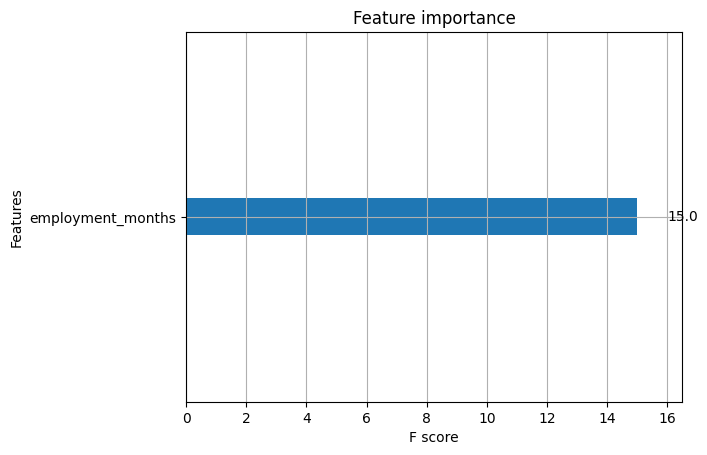

In [ ]:
xgb.plot_importance(creditxgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
accuracy = accuracy_score(label_train, pred_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn import metrics
cnf_matrix_dev = metrics.confusion_matrix(label_train, pred_class)
print(cnf_matrix_dev)

Accuracy: 94.77%
[[1088    0]
 [  60    0]]


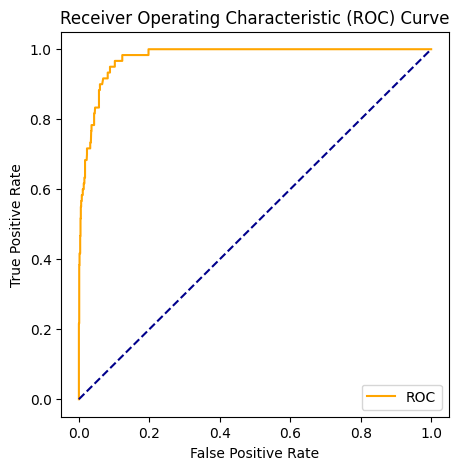

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
label_train
fpr_dev, tpr_dev, thresholds_dev =roc_curve(label_train,pred_prob_1)
plot_roc_curve(fpr_dev, tpr_dev)

In [ ]:
Opticreditxgb = xgb.XGBClassifier(
 learning_rate =0.3,
 n_estimators=100,
 max_depth=15,
 min_child_weight=6,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.6,
 objective= 'binary:logistic'
)

Opticreditxgb.fit(features_train,label_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
accuracy = accuracy_score(label_train, pred_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn import metrics
cnf_matrix_dev = metrics.confusion_matrix(label_train, pred_class)
print(cnf_matrix_dev)

Accuracy: 94.77%
[[1088    0]
 [  60    0]]


In [ ]:
pred_prob = Opticreditxgb.predict_proba(features_train)

#
pred_prob_1 = pred_prob[:,1]
# find cut off Prod to define class label 1-0.11 (11% Bad)
np.quantile(pred_prob_1,0.88)

pred_class = np.where(pred_prob_1>=0.33,1,0)

In [ ]:
accuracy = accuracy_score(label_train, pred_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn import metrics
cnf_matrix_dev = metrics.confusion_matrix(label_train, pred_class)
print(cnf_matrix_dev)

Accuracy: 96.69%
[[1085    3]
 [  35   25]]


In [ ]:
# Score the testing sample
pred_prob_testing = Opticreditxgb.predict_proba(features_test)

pred_prob_test_1 = pred_prob_testing[:,1]

np.quantile(pred_prob_test_1,0.88)

pred_class_testing = np.where(pred_prob_test_1>=0.33,1,0)
accuracy_test = accuracy_score(label_test, pred_class_testing)
print("Accuracy: %.2f%%" % (accuracy_test * 100.0))
from sklearn import metrics
cnf_matrix_test = metrics.confusion_matrix(label_test, pred_class_testing)
print(cnf_matrix_test)

Accuracy: 95.82%
[[275   5]
 [  7   0]]


In [ ]:
threshold=0.5
def make_credit_decision(model, features):
    # Get the predicted probabilities from the model
    pred_probabilities = model.predict_proba(features)

    # Extract the probability of the positive class (e.g., label 1)
    pred_prob_1 = pred_probabilities[:, 1]

    # Make decisions based on the threshold
    decisions = ["Approved" if prob >= threshold else "Rejected" for prob in pred_prob_1]

    return decisions

# Apply the decision function to the test dataset
test_decisions = make_credit_decision(Opticreditxgb, features_test)
print(test_decisions)
rejected_applicant_ids = []
def make_credit_decision(model, features, applicant_ids):
    # Get the predicted probabilities from the model
    pred_probabilities = model.predict_proba(features)

    # Extract the probability of the positive class (e.g., label 1)
    pred_prob_1 = pred_probabilities[:, 1]

    # Make decisions based on the threshold
    decisions = ["Approved" if prob >= threshold else "Rejected" for prob in pred_prob_1]

    # Add the IDs of rejected applicants to the list
    rejected_indices = [i for i, decision in enumerate(decisions) if decision == "Rejected"]
    rejected_applicant_ids.extend(applicant_ids[i] for i in rejected_indices)

    return decisions
# Get the IDs of applicants
applicant_ids = application['ID']

# Apply the decision function to the test dataset
test_decisions = make_credit_decision(Opticreditxgb, features_test, applicant_ids)

# Print the IDs of rejected applicants
print(rejected_applicant_ids)


['Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Approved', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Re